# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.7 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
## code to keep session awake in Udacity workspace
import signal

from contextlib import contextmanager

import requests


DELAY = INTERVAL = 4 * 60  # interval time in seconds
MIN_DELAY = MIN_INTERVAL = 2 * 60
KEEPALIVE_URL = "https://nebula.udacity.com/api/v1/remote/keep-alive"
TOKEN_URL = "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token"
TOKEN_HEADERS = {"Metadata-Flavor":"Google"}


def _request_handler(headers):
    def _handler(signum, frame):
        requests.request("POST", KEEPALIVE_URL, headers=headers)
    return _handler


@contextmanager
def active_session(delay=DELAY, interval=INTERVAL):
    """
    Example:

    from workspace_utils import active session

    with active_session():
        # do long-running work here
    """
    token = requests.request("GET", TOKEN_URL, headers=TOKEN_HEADERS).text
    headers = {'Authorization': "STAR " + token}
    delay = max(delay, MIN_DELAY)
    interval = max(interval, MIN_INTERVAL)
    original_handler = signal.getsignal(signal.SIGALRM)
    try:
        signal.signal(signal.SIGALRM, _request_handler(headers))
        signal.setitimer(signal.ITIMER_REAL, delay, interval)
        yield
    finally:
        signal.signal(signal.SIGALRM, original_handler)
        signal.setitimer(signal.ITIMER_REAL, 0)


def keep_awake(iterable, delay=DELAY, interval=INTERVAL):
    """
    Example:

    from workspace_utils import keep_awake

    for i in keep_awake(range(5)):
        # do iteration with lots of work here
    """
    with active_session(delay, interval): yield from iterable

In [7]:
import pdb
import json
import numpy as np 
import torch 
from collections import deque
from ddpg_agent import DDPGAgents
from utils import ensure_dir
import matplotlib.pyplot as plt

import logging
logging.basicConfig(level=logging.INFO, format='')

In [8]:
from config import Config

In [9]:
exp_config = Config()
agent = DDPGAgents(state_size=24, action_size=2, config=exp_config)
brain_name = env.brain_names[0]

def ddpg(agent, 
         brain_name, 
         config, 
         n_episodes=exp_config.num_episodes
         ):
    """ Deep Deterministic Policy Gradient """
    
    # Set logger for this function
    logger = logging.getLogger("ddpg")
    
    # number of agents
    num_agents = config.num_agents
    
    max_t = 1000
    
    flag = False # When environment is technically solved
    # Save path 
    save_path = "./"
    ensure_dir(save_path)
    scores = [] # list containing scores from each episodes 
    scores_window = deque(maxlen=100)
    
    for i_episode in keep_awake(range(1, n_episodes + 1)):
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        
        # reset noise
        agent.reset()
        
        # get the current state
        state = env_info.vector_observations

        # score of the agents
        score = np.zeros(num_agents)
        
        for t in range(max_t):
            # choose actions
            action = agent.act(state)
            # send the actions to the environment            
            env_info = env.step(action)[brain_name]
            # get the next state
            next_state = env_info.vector_observations
            # get the rewards
            rewards = env_info.rewards
            # see if episode has finished
            dones = env_info.local_done
            # step 
            agent.step(state, action, rewards, next_state, dones)
            # accumulate rewards into score variable
            score += rewards
            # get next_state and set it to state
            state = next_state
            
            if any(dones): 
                break
            
        # save most recent scores (mean amongst the agents)
        scores.append(np.max(score))
        scores_window.append(np.max(score))
        
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if (i_episode % 100 == 0):
            print("\rEpisode {}\tAverage Score: {:.3f}".format(i_episode, \
                                                              np.mean(scores_window)))
        
        # Save occasionnaly 
        if (i_episode % 1000 == 0):
            torch.save(agent.actor_local.state_dict(), save_path + 
                       "checkpoint_actor_" + str(i_episode) + ".pth")
            torch.save(agent.critic_local.state_dict(), save_path + 
                       "checkpoint_critic_" + str(i_episode) + ".pth")
        
        # Check if envionment solved 
        if not flag:
            if (np.mean(scores_window) >= 0.5):
                print("\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}".format(
                i_episode-100, np.mean(scores_window)))
                # Save solved model 
                torch.save(agent.actor_local.state_dict(), save_path + 
                          "checkpoint_actor_solved.pth")
                torch.save(agent.critic_local.state_dict(), save_path + 
                          "checkpoint_critic_solved.pth")
                flag = True
                
                break
                
    return scores
    
scores = ddpg(agent=agent, 
              brain_name=brain_name, 
              config=exp_config)

Episode 100	Average Score: 0.000
Episode 200	Average Score: 0.001
Episode 300	Average Score: 0.000
Episode 400	Average Score: 0.000
Episode 500	Average Score: 0.000
Episode 600	Average Score: 0.000
Episode 700	Average Score: 0.000
Episode 800	Average Score: 0.015
Episode 900	Average Score: 0.002
Episode 1000	Average Score: 0.011
Episode 1100	Average Score: 0.000
Episode 1200	Average Score: 0.010
Episode 1300	Average Score: 0.062
Episode 1400	Average Score: 0.034
Episode 1500	Average Score: 0.026
Episode 1600	Average Score: 0.060
Episode 1700	Average Score: 0.074
Episode 1800	Average Score: 0.085
Episode 1900	Average Score: 0.090
Episode 2000	Average Score: 0.101
Episode 2100	Average Score: 0.138
Episode 2200	Average Score: 0.185
Episode 2300	Average Score: 0.149
Episode 2400	Average Score: 0.475
Episode 2404	Average Score: 0.509
Environment solved in 2304 episodes!	Average Score: 0.509


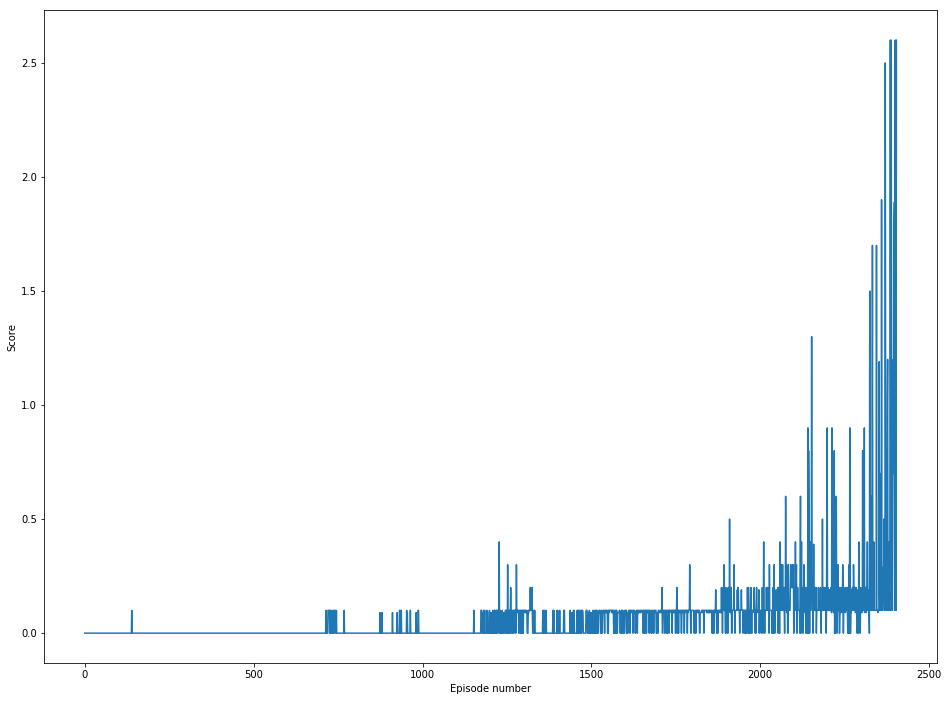

In [10]:
# plot the scores
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.show()